0.2689414213699951


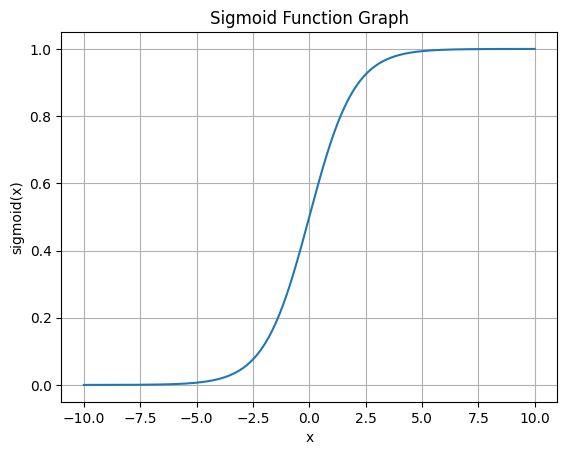

In [ ]:
# 1) Implement the different activation functions for a sample data.

# Sigmoid activation function

import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
   return 1/(1+np.exp(-x))

ip = -1
op = sigmoid(ip)
print(op)
# Define a range of x-values
x = np.linspace(-10, 10, 1000)
y = sigmoid(x)

# Plot the graph
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("sigmoid(x)")
plt.title("Sigmoid Function Graph")
plt.grid(True)
plt.show()

-0.7615941559557649


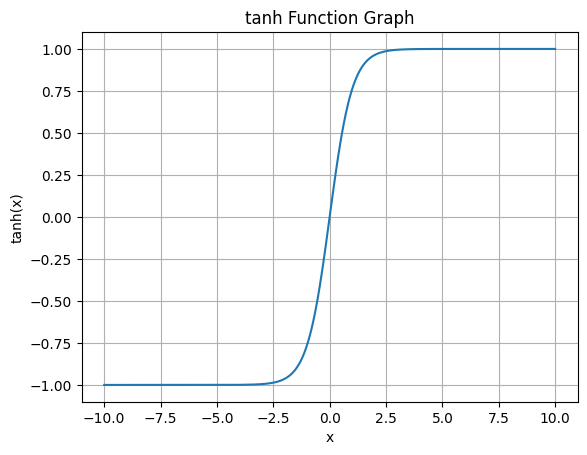

In [ ]:
# tanh activation function

import numpy as np
import matplotlib.pyplot as plt
def tanh(x):
    return ((np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x)))

ip = -1
op = tanh(ip)
print(op)

x = np.linspace(-10, 10, 1000)
y = tanh(x)

# Plot the graph
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("tanh(x)")
plt.title("tanh Function Graph")
plt.grid(True)
plt.show()


10


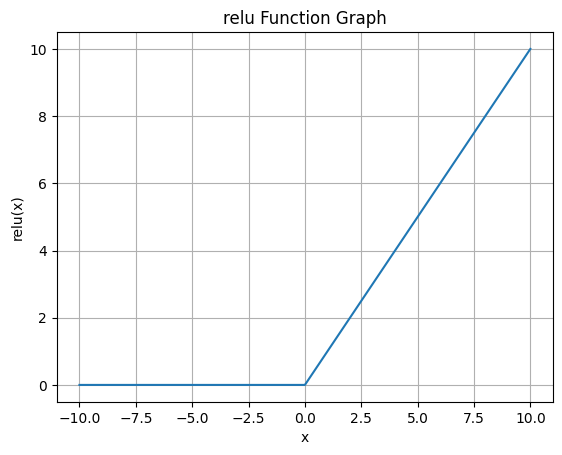

In [ ]:
# 3) activation function

import numpy as np
import matplotlib.pyplot as plt
def relu(x):
    return np.maximum(0,x)

ip = 10
op = relu(ip)
print(op)

x = np.linspace(-10, 10, 1000)
y = relu(x)

# Plot the graph
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("relu(x)")
plt.title("relu Function Graph")
plt.grid(True)
plt.show()


Weights: [0.2 0.1], Bias: 0.0
Predictions: [1 1 0 0]


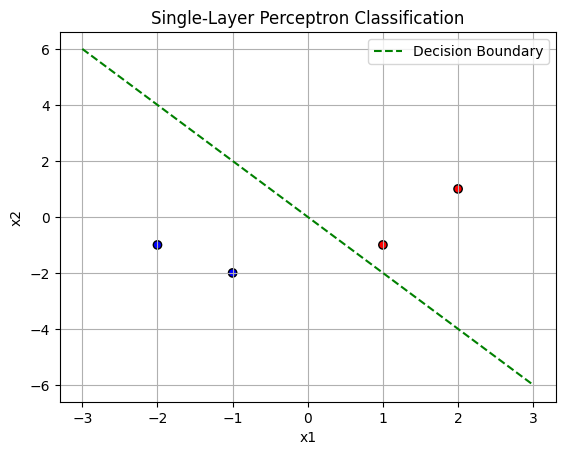

In [ ]:
# 2) Design a single unit perceptron for classification of a linearly separable binary dataset.

import numpy as np
import matplotlib.pyplot as plt

# Step activation function
def step_function(x):
    return np.where(x >= 0, 1, 0)

# Perceptron training function
def perceptron_train(X, y, learning_rate=0.1, epochs=10):
    # Initialize weights and bias
    w = np.zeros(X.shape[1])
    b = 0
    # Training loop
    for epoch in range(epochs):
        for i in range(len(X)):
            # Weighted sum
            z = np.dot(X[i], w) + b
            y_pred = step_function(z)
            # Weight update
            w += learning_rate * (y[i] - y_pred) * X[i]
            b += learning_rate * (y[i] - y_pred)
    return w, b

# Prediction
def perceptron_predict(X, w, b):
    z = np.dot(X, w) + b
    return step_function(z)

# Generate a simple linearly separable dataset
X = np.array([[2, 1],[1, -1],[-1, -2],[-2, -1]])
y = np.array([1, 1, 0, 0])  # Two classes

# Train the perceptron
w, b = perceptron_train(X, y, learning_rate=0.1, epochs=10)
print(f"Weights: {w}, Bias: {b}")

# Test predictions
predictions = perceptron_predict(X, w, b)
print("Predictions:", predictions)

# Plot decision boundary
plt.scatter(X[:,0], X[:,1], c=y, cmap='bwr', edgecolors='k')
x_line = np.linspace(-3, 3, 100)
y_line = -(w[0]*x_line + b)/w[1]
plt.plot(x_line, y_line, 'g--', label='Decision Boundary')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Single-Layer Perceptron Classification")
plt.legend()
plt.grid(True)
plt.show()


d:\HCL\Practice\.conda\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Activation: sigmoid    | Test Accuracy: 0.8000
Activation: tanh       | Test Accuracy: 1.0000
Activation: relu       | Test Accuracy: 1.0000


d:\HCL\Practice\.conda\Lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Activation: leaky_relu | Test Accuracy: 0.9667

--- Activation Function Comparison (Gradient Descent) ---
sigmoid    : 0.8000
tanh       : 1.0000
relu       : 1.0000
leaky_relu : 0.9667


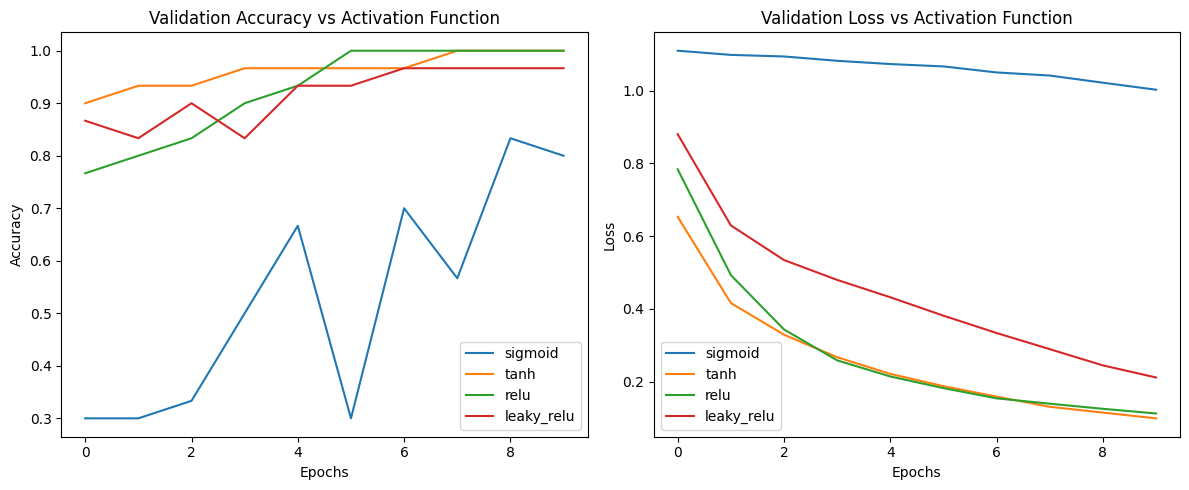

In [ ]:
# 3) Artificial Neural Network using Backpropagation (SGD)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LeakyReLU
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD

iris = load_iris()
X = iris.data
y = iris.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


y_encoded = to_categorical(y)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

#Function to build and train the ANN using Gradient Descent
def build_and_train_model(activation_func):
    model = Sequential()
    if activation_func == 'leaky_relu':
        model.add(Dense(8, input_shape=(X_train.shape[1],)))
        model.add(LeakyReLU(alpha=0.1))
        model.add(Dense(8))
        model.add(LeakyReLU(alpha=0.1))
    else:
        model.add(Dense(8, input_shape=(X_train.shape[1],), activation=activation_func))
        model.add(Dense(8, activation=activation_func))

    model.add(Dense(3, activation='softmax'))

    # SGD → stochastic gradient descent
    optimizer = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer=optimizer,loss='categorical_crossentropy',metrics=['accuracy'])

    history = model.fit(X_train, y_train,epochs=10,batch_size=8,verbose=0,validation_data=(X_test, y_test))

    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    print(f"Activation: {activation_func:10} | Test Accuracy: {test_acc:.4f}")
    return history, test_acc

#Train models with different activation functions
activations = ['sigmoid', 'tanh', 'relu', 'leaky_relu']
results = {}
histories = {}

for act in activations:
    history, acc = build_and_train_model(act)
    results[act] = acc
    histories[act] = history


print("\n--- Activation Function Comparison (Gradient Descent) ---")
for act, acc in results.items():
    print(f"{act:10} : {acc:.4f}")


plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
for act in activations:
    plt.plot(histories[act].history['val_accuracy'], label=f'{act}')
plt.title('Validation Accuracy vs Activation Function')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
for act in activations:
    plt.plot(histories[act].history['val_loss'], label=f'{act}')
plt.title('Validation Loss vs Activation Function')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


Test Accuracy (SGD): 0.9302
Test Accuracy (Adam): 0.9765
Test Accuracy (RMSprop): 0.9760


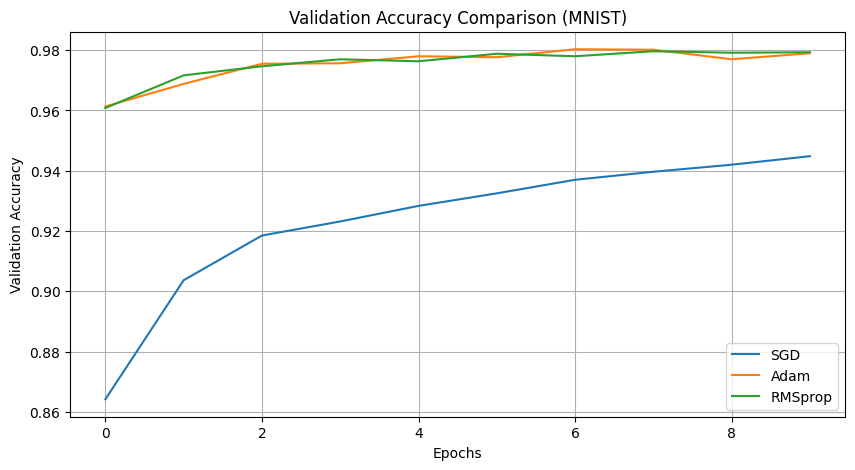


Final Test Accuracies
SGD     : 0.9302
Adam    : 0.9765
RMSprop : 0.9760


In [ ]:
# 4) Implement a simple MLP for classification (e.g., MNIST dataset) using TensorFlow/Keras or PyTorch with different train-test splits. Vary the different optimizers and plot the accuracy.
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np


(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()


X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0


y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

def build_mlp():
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28,28)),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(10, activation='softmax')  # Output layer
    ])
    return model

optimizers = {
    'SGD': keras.optimizers.SGD(learning_rate=0.01),
    'Adam': keras.optimizers.Adam(learning_rate=0.001),
    'RMSprop': keras.optimizers.RMSprop(learning_rate=0.001)
}

histories = {}
test_accuracies = {}

for name, opt in optimizers.items():
    model = build_mlp()
    model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])

    history = model.fit(X_train, y_train_cat,epochs=10,batch_size=128,validation_split=0.1,verbose=0)

    loss, acc = model.evaluate(X_test, y_test_cat, verbose=0)
    print(f"Test Accuracy ({name}): {acc:.4f}")

    histories[name] = history
    test_accuracies[name] = acc

plt.figure(figsize=(10,5))
for name, history in histories.items():
    plt.plot(history.history['val_accuracy'], label=f'{name}')
plt.title('Validation Accuracy Comparison (MNIST)')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

print("\nFinal Test Accuracies")
for name, acc in test_accuracies.items():
    print(f"{name:8}: {acc:.4f}")


In [1]:
# 5)Implement a simple character-level RNN/LSTM for text generation (e.g., generating Shakespearean text).

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

path = keras.utils.get_file('shakespeare.txt', 'https://storage.googleapis.com/download.tensorflow.org/data/shakespeare.txt')
text = open(path, 'r').read()
chars = sorted(list(set(text)))
char2idx = {c:i for i, c in enumerate(chars)}
idx2char = {i:c for i, c in enumerate(chars)}
vocab_size = len(chars)
text_as_int = np.array([char2idx[c] for c in text])
seq_length = 100
char_dataset = tf.data.Dataset.from_tensor_slices(text_as_int)
sequences = char_dataset.batch(seq_length+1, drop_remainder=True)

def split_input_target(chunk):
    return chunk[:-1], chunk[1:]

dataset = sequences.map(split_input_target)
dataset = dataset.shuffle(10000).batch(64, drop_remainder=True)

embedding_dim = 256
rnn_units = 1024

def build_model(vocab_size, embedding_dim, rnn_units):
    return keras.Sequential([
        layers.Embedding(vocab_size, embedding_dim),
        layers.LSTM(rnn_units, return_sequences=True, recurrent_initializer='glorot_uniform'),
        layers.Dense(vocab_size)
    ])

model = build_model(vocab_size, embedding_dim, rnn_units)
model.compile(optimizer='adam', loss=lambda y_true, y_pred: keras.losses.sparse_categorical_crossentropy(y_true, y_pred, from_logits=True))
model.fit(dataset, epochs=5)

def generate_text(model, start_string, num_generate=500, temperature=1.0):
    input_eval = [char2idx[s] for s in start_string]
    input_eval = tf.expand_dims(input_eval, 0)
    text_generated = []
    for _ in range(num_generate):
        predictions = model(input_eval)
        predictions = tf.squeeze(predictions, 0) / temperature
        predicted_id = tf.random.categorical(predictions, num_samples=1)[-1, 0].numpy()
        text_generated.append(idx2char[predicted_id])
        input_eval = tf.expand_dims([predicted_id], 0)
    return start_string + ''.join(text_generated)

print(generate_text(model, start_string="ROMEO: ", num_generate=500, temperature=0.5))


1115394/1115394 ━━━━━━━━━━━━━━━━━━━━ 1s 1us/step
Epoch 1/5
172/172 ━━━━━━━━━━━━━━━━━━━━ 18s 66ms/step - loss: 2.8921
Epoch 2/5
172/172 ━━━━━━━━━━━━━━━━━━━━ 13s 66ms/step - loss: 1.8541
Epoch 3/5
172/172 ━━━━━━━━━━━━━━━━━━━━ 14s 67ms/step - loss: 1.5857
Epoch 4/5
172/172 ━━━━━━━━━━━━━━━━━━━━ 13s 68ms/step - loss: 1.4521
Epoch 5/5
172/172 ━━━━━━━━━━━━━━━━━━━━ 13s 68ms/step - loss: 1.3703
ROMEO: Pl s tocoth the the tthe he hean me the gounoue me the theve y fis hake t thinone thean youpres;
AROLUHameanghe thes these hange thalange s anoumy t an t at wid the t y I'Ches, s hend mst t t thare ththe be the t an s meluth and d the the t t th t the an be berasthe he hanoureame thoula he, and-I I anonol inore be d the mare the minore the he he he our this mes the:


War the tinor ocoure mer tamoure s anoue the he qurth t than ar me anis a thind to the he che and her t s I t henores be that bre


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

Training Autoencoder with latent dimension = 2
Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.1565 - val_loss: 0.0717
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0707 - val_loss: 0.0679
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0669 - val_loss: 0.0639
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0637 - val_loss: 0.0621
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0622 - val_loss: 0.0611
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0611 - val_loss: 0.0604
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0604 - val_loss: 0.0598
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0599 - val_loss: 0.0592
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0593 - val_loss: 0.0588
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0588 - val_loss: 0.0585
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


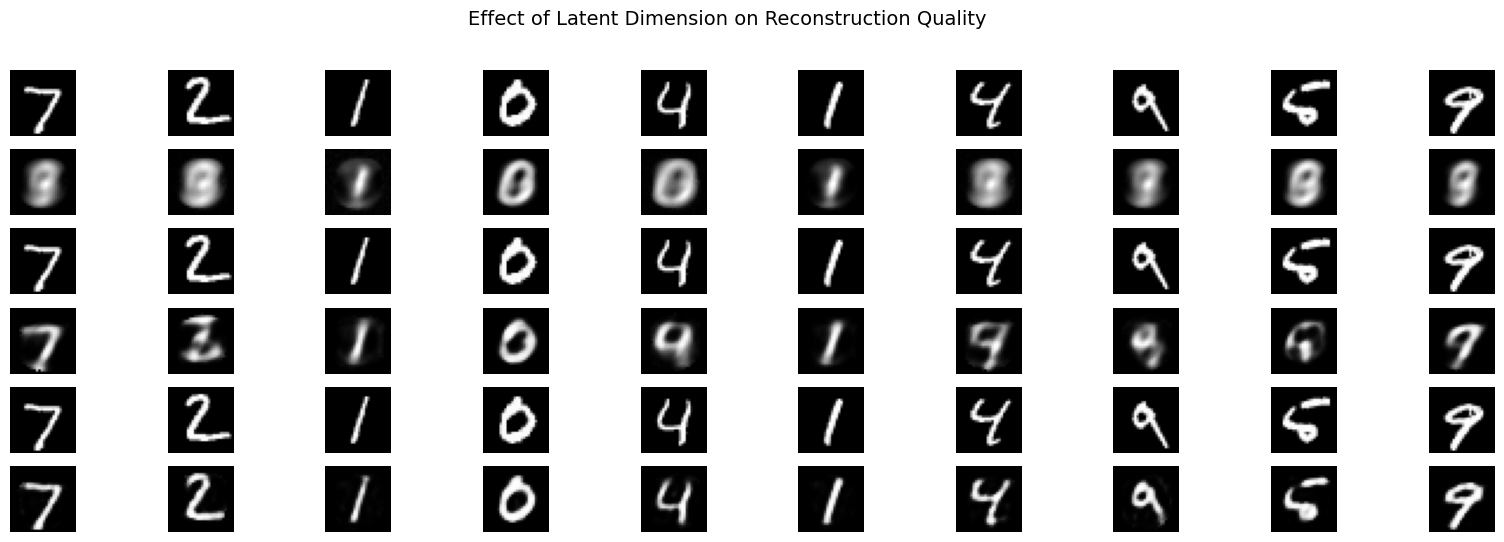

In [ ]:
# 6) Implement a basic autoencoder with one hidden layer for dimensionality reduction.Vary the size of the latent space (e.g., 2D, 10D, 50D) and analyze its effect on reconstruction quality.
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train.reshape((len(x_train), 784))
x_test = x_test.reshape((len(x_test), 784))

def build_autoencoder(latent_dim):
    input_img = Input(shape=(784,))
    encoded = Dense(latent_dim, activation='relu')(input_img)
    decoded = Dense(784, activation='sigmoid')(encoded)

    autoencoder = Model(input_img, decoded)
    autoencoder.compile(optimizer=Adam(), loss='mse')
    return autoencoder

latent_dims = [2, 10, 50]
reconstructed_imgs = {}

for dim in latent_dims:
    print(f"\nTraining Autoencoder with latent dimension = {dim}")
    autoencoder = build_autoencoder(dim)
    autoencoder.fit(x_train, x_train,
                    epochs=10,
                    batch_size=256,
                    shuffle=True,
                    validation_data=(x_test, x_test),
                    verbose=1)
    decoded_imgs = autoencoder.predict(x_test[:10])
    reconstructed_imgs[dim] = decoded_imgs

n = 10
plt.figure(figsize=(20, 6))

for j, dim in enumerate(latent_dims):
    decoded_imgs = reconstructed_imgs[dim]

    for i in range(n):
        # Original images
        ax = plt.subplot(len(latent_dims) * 2, n, i + 1 + j * 2 * n)
        plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
        if i == 0:
            plt.ylabel(f"Latent {dim}D\nOriginal", fontsize=10)
        plt.axis('off')

        # Reconstructed images
        ax = plt.subplot(len(latent_dims) * 2, n, i + 1 + n + j * 2 * n)
        plt.imshow(decoded_imgs[i].reshape(28, 28), cmap='gray')
        if i == 0:
            plt.ylabel("Reconstructed", fontsize=10)
        plt.axis('off')

plt.suptitle("Effect of Latent Dimension on Reconstruction Quality", fontsize=14)
plt.show()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 52s 314ms/step - loss: 0.0363 - val_loss: 0.0106
Epoch 2/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 51s 326ms/step - loss: 0.0098 - val_loss: 0.0080
Epoch 3/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 80s 317ms/step - loss: 0.0076 - val_loss: 0.0070
Epoch 4/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 50s 318ms/step - loss: 0.0068 - val_loss: 0.0065
Epoch 5/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 82s 316ms/step - loss: 0.0063 - val_loss: 0.0061
Epoch 6/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 85s 336ms/step - loss: 0.0060 - val_loss: 0.0059
Epoch 7/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 52s 329ms/step - loss: 0.0058 - val_loss: 0.0056
Epoch 8/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 82s 331ms/step - loss: 0.0056 - val_loss: 0.0054
Epoch 9/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 81s 324ms/step - loss: 0.0054 - val_loss: 0.0054
Epoch 10/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 83s 329ms/step - loss: 0.0053 - val_loss: 0.0052
Epoch 11/20
157/157 ━━━━━━━━━━━━━━━━━━━━ 51s 324ms/step 

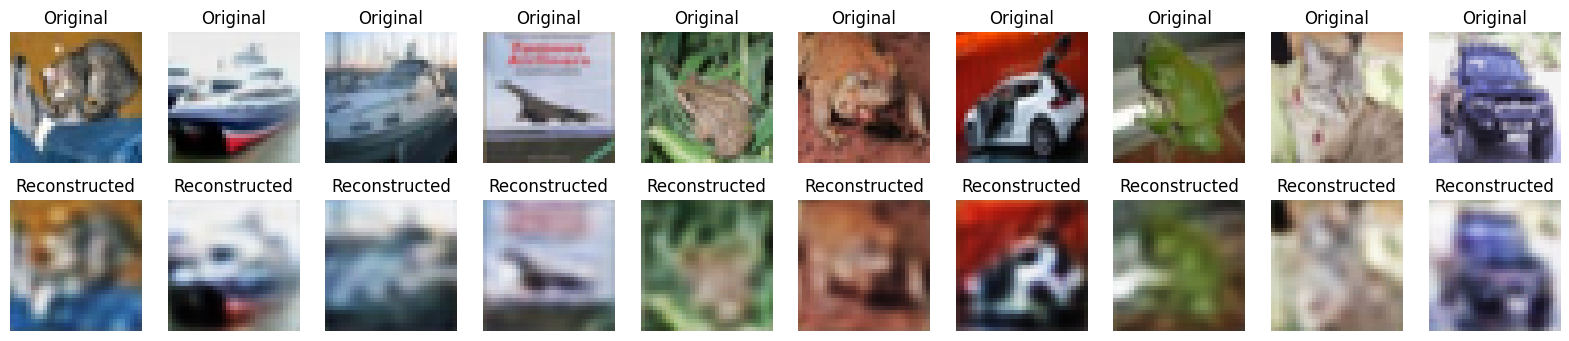

In [ ]:
# 7) Demonstrate autoencoder for reconstructing CIFAR-10 data.

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.optimizers import Adam

(x_train, _), (x_test, _) = cifar10.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train[:20000]
x_test = x_test[:5000]

input_img = Input(shape=(32, 32, 3))

# Encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer=Adam(), loss='mse')

history = autoencoder.fit(
    x_train, x_train,
    epochs=20,
    batch_size=128,
    shuffle=True,
    validation_data=(x_test, x_test)
)

decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])
    plt.title("Original")
    plt.axis("off")

    # Reconstructed
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i])
    plt.title("Reconstructed")
    plt.axis("off")
plt.show()


169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 8, 8, 128) │      6,272 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reshape (Reshape)   │ (None, 64, 128)   │          0 │ conv2d[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalization │ (None, 64, 128)   │        256 │ reshape[0][0]     │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 64, 64)    │      8,256 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 64, 64)    │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 64, 128)   │      8,320 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 64, 128)   │          0 │ reshape[0][0],    │
│                     │                   │            │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 64, 128)   │        256 │ add[0][0]         │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 64, 64)    │      8,256 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 64, 64)    │          0 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 64, 128)   │      8,320 │ dropout_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_1 (Add)         │ (None, 64, 128)   │          0 │ add[0][0],        │
│                     │                   │            │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 64, 128)   │        256 │ add_1[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 64, 64)    │      8,256 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 64, 64)    │          0 │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 64, 128)   │      8,320 │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_2 (Add)         │ (None, 64, 128)   │          0 │ add_1[0][0],      │
│                     │                   │            │ dense_5[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 64, 128)   │        256 │ add_2[0][0]       │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 64, 64)    │      8,256 │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 64, 64)    │          0 │ dense_6[0][0]   

 Total params: 288,740 (1.10 MB)

 Trainable params: 288,740 (1.10 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 61s 39ms/step - accuracy: 0.0351 - loss: 4.4214 - val_accuracy: 0.0820 - val_loss: 4.0367
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.0870 - loss: 3.9816 - val_accuracy: 0.1162 - val_loss: 3.8270
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.1213 - loss: 3.7847 - val_accuracy: 0.1142 - val_loss: 3.8281
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.1355 - loss: 3.7109 - val_accuracy: 0.1589 - val_loss: 3.6010
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.1570 - loss: 3.5967 - val_accuracy: 0.1567 - val_loss: 3.6138
313/313 - 3s - 11ms/step - accuracy: 0.1567 - loss: 3.6138
Test Accuracy: 0.1567


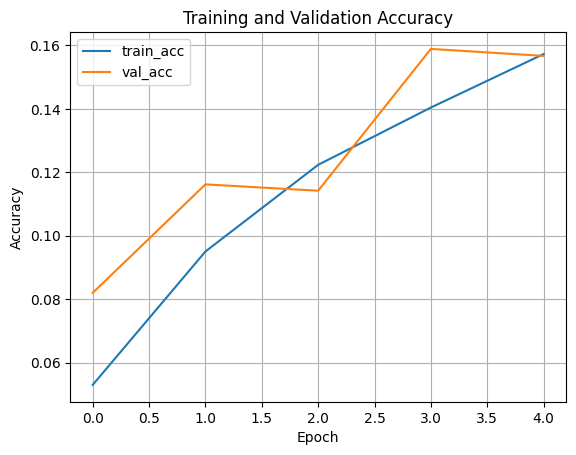

In [1]:
#Assignments
# 1) Image classification with modern MLP models
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
def build_mlp_mixer(input_shape, num_classes, patch_size=4, num_blocks=8, hidden_dim=128, token_dim=64, dropout_rate=0.25):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(hidden_dim, kernel_size=patch_size, strides=patch_size)(inputs)
    x = layers.Reshape((-1, hidden_dim))(x)  # Flatten patches: (num_patches, hidden_dim)
    for _ in range(num_blocks):
        y = layers.LayerNormalization()(x)
        y = layers.Dense(token_dim, activation='gelu')(y)
        y = layers.Dropout(dropout_rate)(y)
        y = layers.Dense(hidden_dim)(y)
        x = layers.Add()([x, y])

        y = layers.LayerNormalization()(x)
        y = layers.Dense(token_dim, activation='gelu')(y)
        y = layers.Dropout(dropout_rate)(y)
        y = layers.Dense(hidden_dim)(y)
        x = layers.Add()([x, y])

    x = layers.LayerNormalization()(x)
    x = layers.GlobalAveragePooling1D()(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    model = models.Model(inputs, outputs)
    return model

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar100.load_data(label_mode='fine')

x_train, x_test = x_train / 255.0, x_test / 255.0
y_train = tf.keras.utils.to_categorical(y_train, 100)
y_test = tf.keras.utils.to_categorical(y_test, 100)

model = build_mlp_mixer(x_train.shape[1:], num_classes=100)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(x_train, y_train,epochs=5,batch_size=64,validation_data=(x_test, y_test))
loss, acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {acc:.4f}")

plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title("Training and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.5613 - loss: 0.6744 - val_accuracy: 0.7238 - val_loss: 0.5406
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.8168 - loss: 0.4077 - val_accuracy: 0.7794 - val_loss: 0.4853
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.9372 - loss: 0.1800 - val_accuracy: 0.7826 - val_loss: 0.5342
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.9802 - loss: 0.0717 - val_accuracy: 0.7340 - val_loss: 0.7657
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.9901 - loss: 0.0341 - val_accuracy: 0.7648 - val_loss: 0.7829
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7525 - loss: 0.8273

Test Accuracy: 0.7581


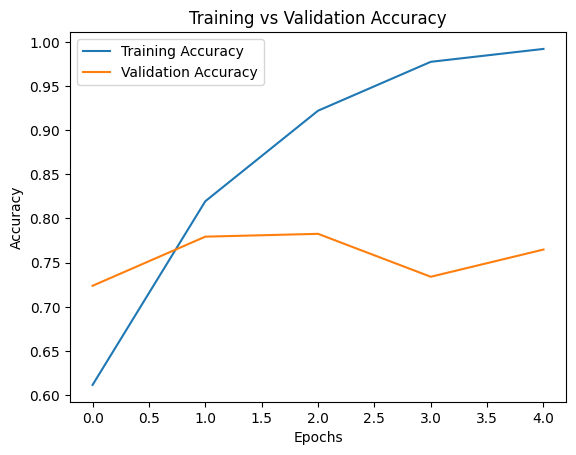

In [1]:
# 2)Implement RNN for sentiment analysis on movie reviews.

import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt


max_words = 10000
max_len = 200
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_words)
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)


model = Sequential([
    Embedding(max_words, 128, input_length=max_len),
    SimpleRNN(64, activation='tanh'),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

history = model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.2
)

test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0729 - val_loss: 0.0222
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0208 - val_loss: 0.0179
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0171 - val_loss: 0.0156
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0152 - val_loss: 0.0144
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0141 - val_loss: 0.0140
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0133 - val_loss: 0.0130
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0127 - val_loss: 0.0123
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0121 - val_loss: 0.0119
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0118 - val_loss: 0.0115
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0113 - val_loss: 0.0113
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.0775 - val_loss: 0.0296
Epoch 2/10
2

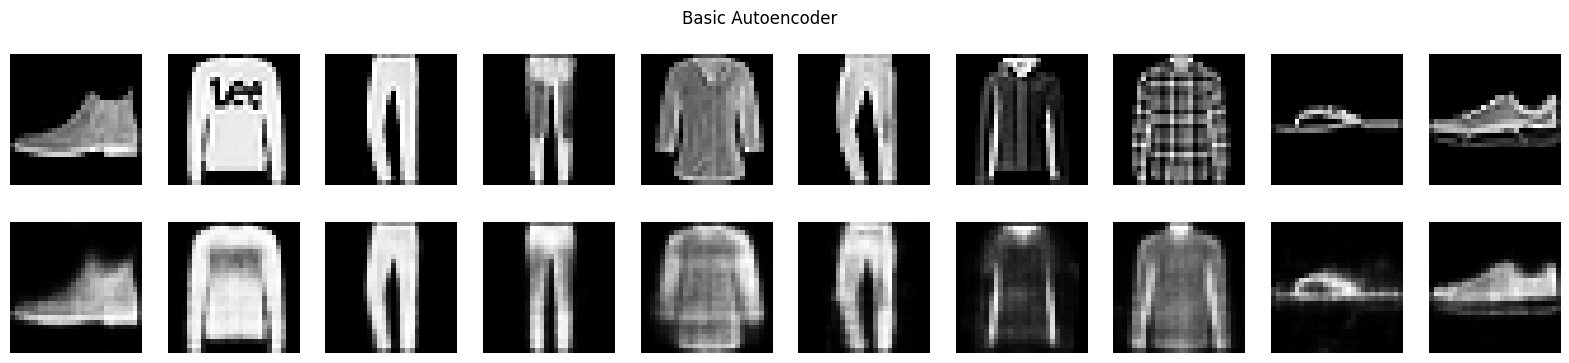

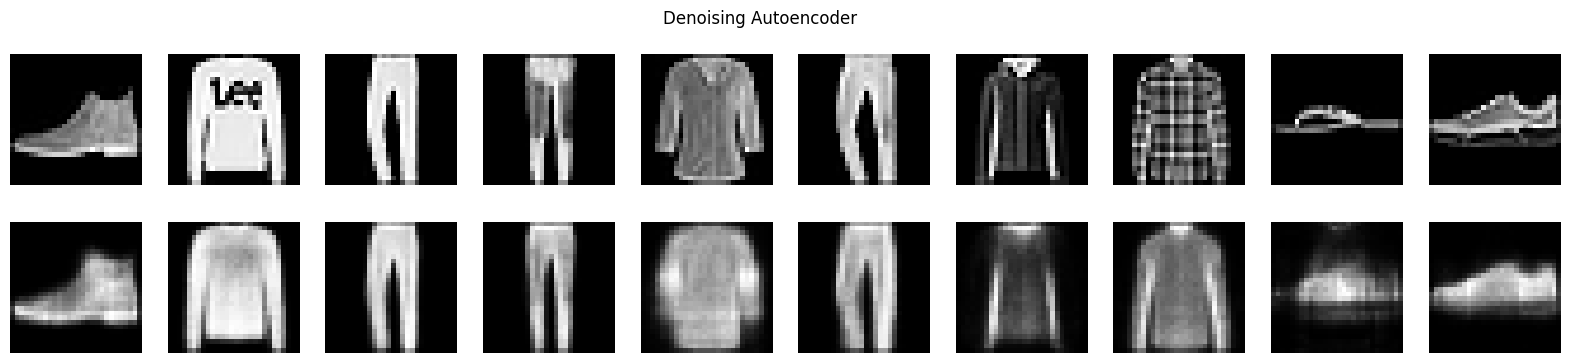

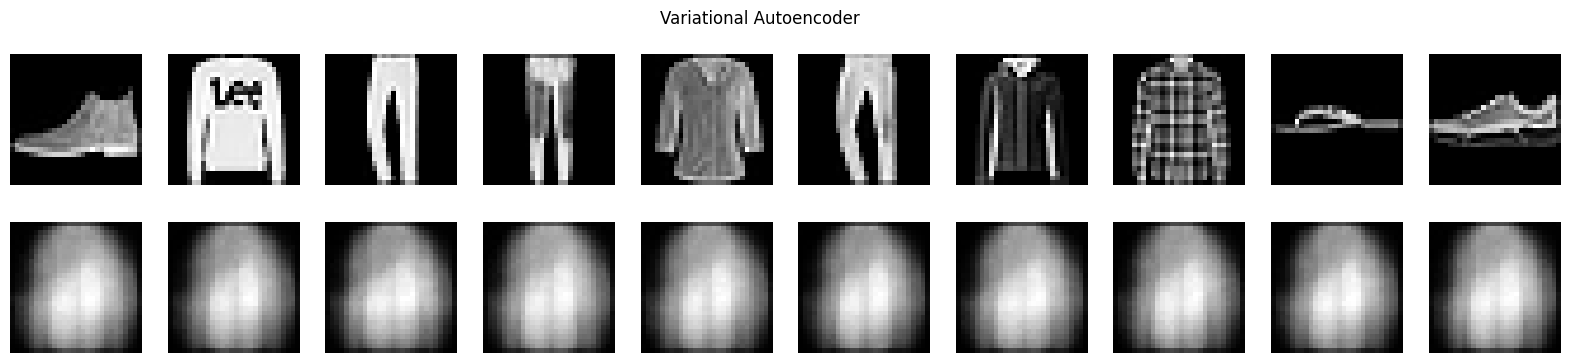

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0852
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0837
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0825
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0815
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0796
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0775
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0758
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0744
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0731
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0715


In [5]:
# 3) Demonstrate the different types of autoencoders using Fashion MNIST dataset and any industrial dataset.
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Lambda
from tensorflow.keras.models import Model

(x_train, _), (x_test, _) = tf.keras.datasets.fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train_flat = x_train.reshape((len(x_train), -1))
x_test_flat = x_test.reshape((len(x_test), -1))

input_dim = x_train_flat.shape[1]
latent_dim = 64

input_img = Input(shape=(input_dim,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(latent_dim, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

basic_autoencoder = Model(input_img, decoded)
basic_autoencoder.compile(optimizer='adam', loss='mse')

basic_autoencoder.fit(
    x_train_flat, x_train_flat,
    epochs=10, batch_size=256,
    validation_data=(x_test_flat, x_test_flat)
)

reconstructed_basic = basic_autoencoder.predict(x_test_flat)

noise_factor = 0.5
x_train_noisy = np.clip(x_train_flat + noise_factor * np.random.normal(size=x_train_flat.shape), 0., 1.)
x_test_noisy = np.clip(x_test_flat + noise_factor * np.random.normal(size=x_test_flat.shape), 0., 1.)

input_noisy = Input(shape=(input_dim,))
encoded_noisy = Dense(128, activation='relu')(input_noisy)
encoded_noisy = Dense(latent_dim, activation='relu')(encoded_noisy)
decoded_noisy = Dense(128, activation='relu')(encoded_noisy)
decoded_noisy = Dense(input_dim, activation='sigmoid')(decoded_noisy)

denoising_autoencoder = Model(input_noisy, decoded_noisy)
denoising_autoencoder.compile(optimizer='adam', loss='mse')

denoising_autoencoder.fit(
    x_train_noisy, x_train_flat,
    epochs=10, batch_size=256,
    validation_data=(x_test_noisy, x_test_flat)
)

reconstructed_denoise = denoising_autoencoder.predict(x_test_noisy)

#VARIATIONAL AUTOENCODER (VAE)

intermediate_dim = 256
latent_dim = 64

def sampling(args):
    """Sampling function for VAE latent space."""
    z_mean, z_log_var = args
    epsilon = tf.random.normal(shape=tf.shape(z_mean))
    return z_mean + tf.exp(0.5 * z_log_var) * epsilon

class VAE(tf.keras.Model):
    def __init__(self, input_dim, intermediate_dim, latent_dim, **kwargs):
        super(VAE, self).__init__(**kwargs)
        self.encoder_h = Dense(intermediate_dim, activation='relu')
        self.z_mean = Dense(latent_dim)
        self.z_log_var = Dense(latent_dim)
        self.decoder_h = Dense(intermediate_dim, activation='relu')
        self.decoder_mean = Dense(input_dim, activation='sigmoid')

    def call(self, inputs):
        h = self.encoder_h(inputs)
        z_mean = self.z_mean(h)
        z_log_var = self.z_log_var(h)
        z = sampling([z_mean, z_log_var])
        h_decoded = self.decoder_h(z)
        x_decoded_mean = self.decoder_mean(h_decoded)

        kl_loss = -0.5 * tf.reduce_mean(
            1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var)
        )
        self.add_loss(kl_loss)
        return x_decoded_mean

vae = VAE(input_dim=input_dim, intermediate_dim=intermediate_dim, latent_dim=latent_dim)
vae.compile(optimizer='adam', loss='mse')

vae.fit(
    x_train_flat, x_train_flat,
    epochs=10, batch_size=256,
    validation_data=(x_test_flat, x_test_flat)
)

reconstructed_vae = vae.predict(x_test_flat)

def plot_reconstruction(original, reconstructed, title, n=10):
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # Original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(original[i].reshape(28, 28), cmap='gray')
        plt.axis('off')
        # Reconstructed
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(reconstructed[i].reshape(28, 28), cmap='gray')
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

plot_reconstruction(x_test_flat, reconstructed_basic, "Basic Autoencoder")
plot_reconstruction(x_test_flat, reconstructed_denoise, "Denoising Autoencoder")
plot_reconstruction(x_test_flat, reconstructed_vae, "Variational Autoencoder")


num_features = 20
num_samples = 1000
X_industrial = np.random.rand(num_samples, num_features)

input_ind = Input(shape=(num_features,))
encoded_ind = Dense(16, activation='relu')(input_ind)
encoded_ind = Dense(8, activation='relu')(encoded_ind)
decoded_ind = Dense(16, activation='relu')(encoded_ind)
decoded_ind = Dense(num_features, activation='sigmoid')(decoded_ind)

industrial_autoencoder = Model(input_ind, decoded_ind)
industrial_autoencoder.compile(optimizer='adam', loss='mse')

industrial_autoencoder.fit(X_industrial, X_industrial, epochs=10, batch_size=32)

